In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Inspect actions (portfolio weights)
Note: Backtest must be completed before insection of its actions can be done.

In [2]:
def make_int(x):
    try:
        if x.is_integer():
            x = int(x)
        return x
    except Exception as e:
        return x

In [3]:
def get_actions(market_name, model_base_name, gamma_trade, gamma_risk, gamma_hold, seed=0):
    return pd.read_csv(f'../experiments/{market_name}/seeded/{model_base_name}/seed_{seed}/trade_{gamma_trade}_risk_{gamma_risk}_hold_{gamma_hold}/actions.csv', index_col=0, parse_dates=True)

In [4]:
# papermill parameters
# specify which backtest to inspect
MARKET_NAME = 'DOW_30' # use either | 'DOW_30' | 'LA_40' | 'NIK_25' |
MODEL_BASE_NAME = 'RL_CNN' # use either | 'RL_CNN' | 'RL_str_fcast' | 'RL_all_inp' |
N = 10 # how many plots to make
SEED = 0 # don't change - backtests were only done for seed=0

In [5]:
# create directory to save action plots if it doesn't exist already
if not os.path.exists(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}'):
    os.makedirs(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}')

In [6]:
# see the possible gamma values to select from (these were all on the frontier for the given seed)
frontier_df = pd.read_csv(f'../experiments/{MARKET_NAME}/seeded/{MODEL_BASE_NAME}/backtests/{MARKET_NAME}_{MODEL_BASE_NAME}_seed_frontiers.csv')
frontier_df = frontier_df[frontier_df['seed']==SEED]
frontier_df = frontier_df.sort_values(by=['excess_risk', 'sharpe'], ascending=True)
frontier_df.head()

,gamma_trade,gamma_risk,gamma_hold,seed,excess_return,excess_risk,sharpe,is_pareto
0,10.0,1000.0,1000.0,0,3.114817,10.617843,0.293357,True
1,0.1,1000.0,1000.0,0,3.630560,10.656674,0.340684,True
2,1000.0,10000.0,10000.0,0,4.161235,10.687049,0.389372,True
3,100.0,1000.0,1000.0,0,5.257792,10.805601,0.486580,True
4,1.0,100.0,100.0,0,5.863622,11.222201,0.522502,True


In [7]:
# gamma_trade_list = [make_int(i) for i in list(frontier_df['gamma_trade'].round(3))]
# gamma_risk_list = [make_int(j) for j in list(frontier_df['gamma_risk'].round(3))]
# gamma_hold_list = [make_int(k) for k in list(frontier_df['gamma_hold'].round(3))]

# GAMMA_TRIOS = list(zip(gamma_trade_list, gamma_risk_list, gamma_hold_list))
# GAMMA_TRIOS

In [8]:
# get N risk brackets
risk_min = frontier_df['excess_risk'].min()
risk_max = frontier_df['excess_risk'].max()
risk_range = risk_max - risk_min
risk_jump = risk_range/N

print(f'min={risk_min} - max={risk_max}')
print(f'jump={risk_jump}')

risk_brackets = [( risk_min+(i*risk_jump) , risk_min+((i+1)*risk_jump) ) for i in range(N)]

min=10.617843339481523 - max=14.269358502356793
jump=0.36515151628752707


In [9]:
# risk_brackets

In [10]:
frontier_df

,gamma_trade,gamma_risk,gamma_hold,seed,excess_return,excess_risk,sharpe,is_pareto
0,10.0,1000.0,1000.0,0,3.114817,10.617843,0.293357,True
1,0.1,1000.0,1000.0,0,3.630560,10.656674,0.340684,True
2,1000.0,10000.0,10000.0,0,4.161235,10.687049,0.389372,True
3,100.0,1000.0,1000.0,0,5.257792,10.805601,0.486580,True
4,1.0,100.0,100.0,0,5.863622,11.222201,0.522502,True
5,10.0,100.0,100.0,0,7.197336,11.421628,0.630150,True
6,1000.0,1000.0,100.0,0,8.863956,11.735068,0.755339,True
7,100.0,100.0,100.0,0,9.431829,12.116279,0.778443,True
8,100.0,100.0,10.0,0,9.581692,12.284376,0.779990,True
9,100.0,100.0,1.0,0,10.006519,12.614879,0.793231,True


[1/10]	bracket=(10.62, 10.98)
[2/10]	bracket=(10.98, 11.35)
[3/10]	bracket=(11.35, 11.71)
[4/10]	bracket=(11.71, 12.08)
[5/10]	bracket=(12.08, 12.44)
[6/10]	bracket=(12.44, 12.81)
	no result for [7/10] index 0 is out of bounds for axis 0 with size 0
[8/10]	bracket=(13.17, 13.54)
[9/10]	bracket=(13.54, 13.9)
[10/10]	bracket=(13.9, 14.27)


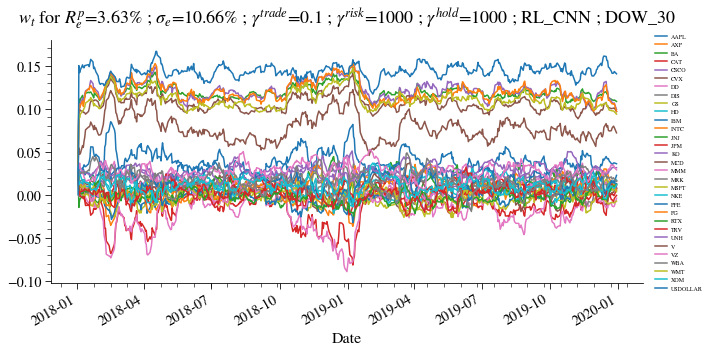

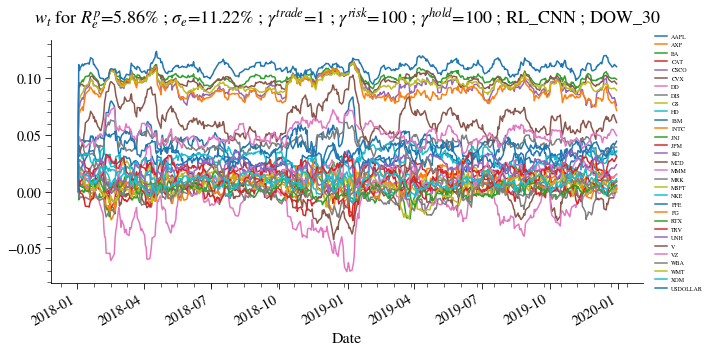

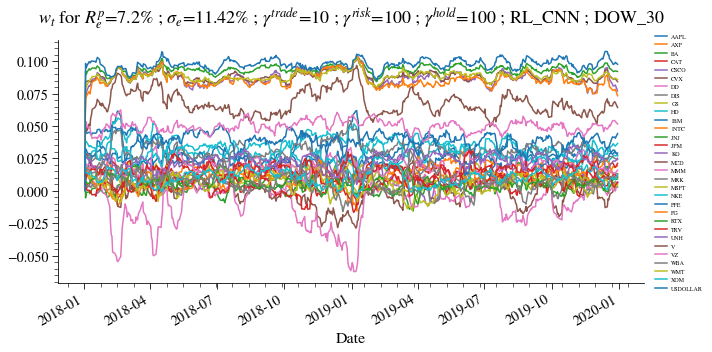

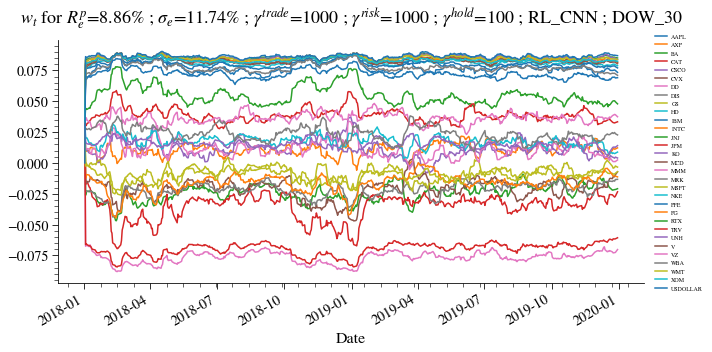

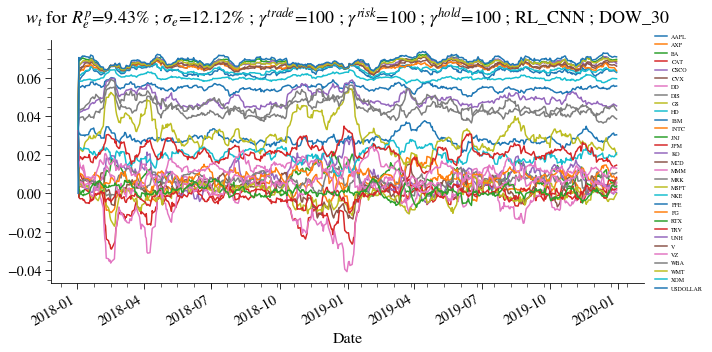

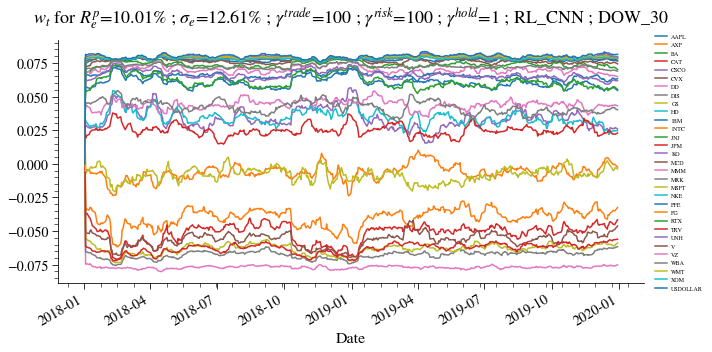

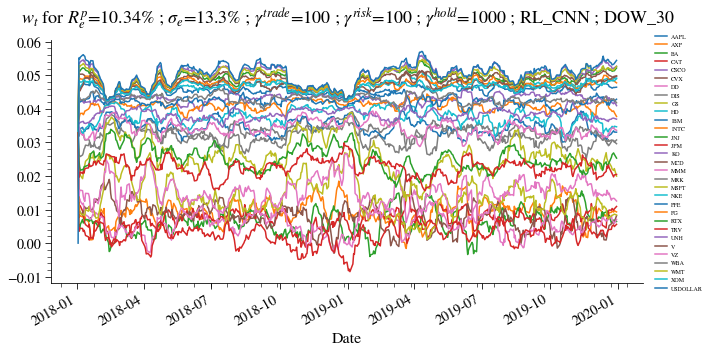

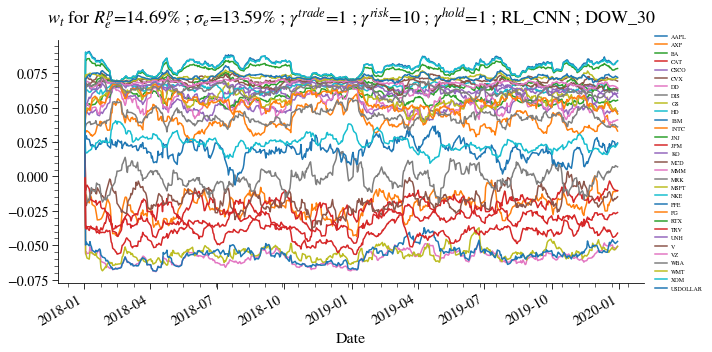

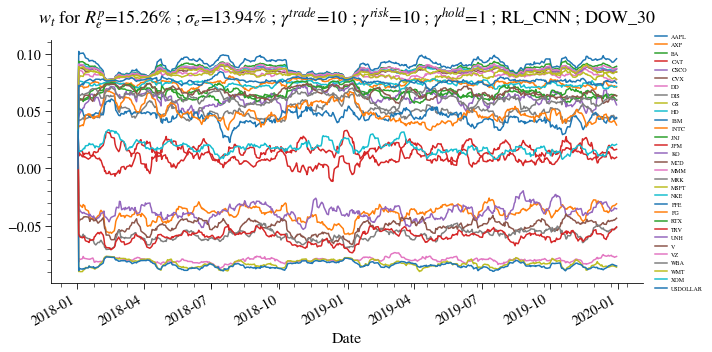

In [11]:
for n in range(N):
    try:
        #idx = (len(frontier_df)//N) * n 
        #GAMMA_TRADE, GAMMA_RISK = GAMMA_PAIRS[idx]
        #print(f'[{m+1}/{N}]\tidx={idx}\tgammas=({GAMMA_TRADE}, {GAMMA_RISK})')
        
        bracket = risk_brackets[n]
        result = frontier_df[(frontier_df['excess_risk']>bracket[0]) & \
                             (frontier_df['excess_risk']<bracket[1])].head(1)
        ret = result['excess_return'].values[0]
        risk = result['excess_risk'].values[0]
        
        GAMMA_TRADE = make_int(result['gamma_trade'].values[0])
        GAMMA_RISK = make_int(result['gamma_risk'].values[0])
        GAMMA_HOLD = make_int(result['gamma_hold'].values[0])

        rl_actions = get_actions(market_name=MARKET_NAME, 
                                 model_base_name=MODEL_BASE_NAME, 
                                 gamma_trade=GAMMA_TRADE, 
                                 gamma_risk=GAMMA_RISK, 
                                 gamma_hold=GAMMA_HOLD, 
                                 seed=SEED)

        print(f'[{n+1}/{N}]\tbracket=({round(bracket[0],2)}, {round(bracket[1],2)})')

        #result = frontier_df[(frontier_df['gamma_trade']==GAMMA_TRADE) & \
        #                  (frontier_df['gamma_risk']==GAMMA_RISK) & \
        #                  (frontier_df['seed']==SEED)]
        

        plot_title = '$w_t$ for $R^p_e$='+f'{round(ret,2)}% ; '+ \
                    '$\sigma_e$='+f'{round(risk,2)}% ; '+\
                    '$\gamma^{trade}$='+f'{GAMMA_TRADE} ; '+\
                    '$\gamma^{risk}$='+f'{GAMMA_RISK} ; '+\
                    '$\gamma^{hold}$='+f'{GAMMA_HOLD} ; '+\
                    f'{MODEL_BASE_NAME} ; {MARKET_NAME}'

        rl_actions.plot(legend=False, figsize=(10,5), title=plot_title)
        plt.legend(bbox_to_anchor=(1.11, 1.05), prop={'size': 6})
        plt.savefig(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}/{n}.png') #_risk_{GAMMA_RISK}_trade_{GAMMA_TRADE}.png')
        
    except Exception as e:
        print(f'\tno result for [{n+1}/{N}]', e)

In [12]:
rl_actions

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,USDOLLAR
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.000000
2018-01-03,0.101902,-0.028883,0.093376,0.011554,-0.037598,-0.044927,-0.081488,-0.057758,-0.089783,0.091118,...,0.036233,0.060321,0.010766,0.090944,0.064218,0.090500,0.061909,0.088671,0.014546,0.072258
2018-01-04,0.099798,-0.032016,0.092501,0.014408,-0.035730,-0.045657,-0.078851,-0.058000,-0.089524,0.089583,...,0.037123,0.060544,0.011488,0.090518,0.060546,0.090462,0.063570,0.086679,0.015102,0.071395
2018-01-05,0.100162,-0.032105,0.092784,0.015246,-0.037146,-0.044383,-0.079222,-0.059218,-0.089862,0.089680,...,0.036939,0.060747,0.012647,0.089819,0.060308,0.090359,0.063526,0.087657,0.014728,0.072371
2018-01-08,0.100355,-0.033938,0.092997,0.014617,-0.038991,-0.043866,-0.078550,-0.059261,-0.089806,0.089876,...,0.037837,0.059977,0.010108,0.089271,0.059549,0.090392,0.065119,0.087968,0.016002,0.073813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.093375,-0.034470,0.087944,0.017866,-0.037306,-0.045324,-0.075610,-0.053110,-0.085000,0.085873,...,0.040247,0.062063,0.008398,0.085111,0.061448,0.087417,0.061184,0.083292,0.020115,0.075053
2019-12-24,0.092438,-0.033013,0.087410,0.018349,-0.036615,-0.045641,-0.076584,-0.053106,-0.084878,0.085549,...,0.040606,0.061931,0.009868,0.084776,0.063174,0.086525,0.060382,0.082849,0.020987,0.074965
2019-12-26,0.092715,-0.032304,0.087538,0.016336,-0.035931,-0.044877,-0.076675,-0.053493,-0.084941,0.085645,...,0.041612,0.062298,0.009078,0.084857,0.063278,0.086549,0.060403,0.082601,0.020175,0.075481


In [13]:
print('done.')

done.
